# Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

Also, determine the optimal value of lambda for ridge and lasso regression.

## Business Goal 
 
You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import GridSearchCV

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

### Data Understanding and Prepration

In [108]:
house_data = pd.read_csv("train.csv")
house_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [109]:
#Check columns 
house_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
  

In [110]:
# get shape of the dataframe
house_data.shape

(1460, 81)

In [111]:
# get model description 
house_data.describe()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [112]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [113]:
#chek any null column exist or not
nuni = house_data.nunique()
nuni[nuni==0]

Series([], dtype: int64)

In [114]:
#Drop columns with maximum missing values
house_data = house_data.drop(columns=['PoolQC','Fence', 'MiscFeature'])

In [115]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [116]:
house_data.Alley.value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [117]:
#check unique values of FireplaceQu 
house_data.FireplaceQu.value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [118]:
#check Missing values of columns
house_data.isnull().sum()[house_data.isnull().sum()>0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
dtype: int64

In [119]:
#Drop Alley column
house_data=house_data.drop(columns=['Alley'])

In [120]:
#replace Nan values of FireplaceQu with NA i.e. No Fireplace 
house_data.FireplaceQu = house_data.FireplaceQu.fillna('NA')

In [121]:
#check missing values
house_data.isnull().sum()[house_data.isnull().sum()>0]

LotFrontage     259
MasVnrType        8
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [122]:
#check unique values of LotFrontage
house_data.LotFrontage.value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: LotFrontage, Length: 110, dtype: int64

In [123]:
#check median of LotFrontage
LotFrontage_median = house_data.LotFrontage.median()
LotFrontage_median

69.0

In [124]:
#impute missing values of LotFrontage with median due to some outliers in data shown from Descibe section
house_data.LotFrontage = house_data.LotFrontage.fillna(LotFrontage_median)

In [125]:
#impute missing values of MasVnrArea with median due to some outliers in data shown from Descibe section
house_data.MasVnrArea = house_data.MasVnrArea.fillna(house_data.MasVnrArea.median())    

In [126]:
#replace Nan values of MasVnrArea with None i.e. No Masonary type
house_data.MasVnrType = house_data.MasVnrType.fillna('None')

In [127]:
#replace Nan values of BsmtQual with NA i.e. No Basement
house_data.BsmtQual = house_data.BsmtQual.fillna('NA')

In [128]:
#replace Nan values of BsmtCond with NA i.e. No Basement
house_data.BsmtCond = house_data.BsmtCond.fillna('NA')

In [129]:
#replace Nan values of BsmtExposure with No i.e. No Exposure
house_data.BsmtExposure = house_data.BsmtExposure.fillna('No')

In [130]:
#replace Nan values of BsmtFinType1 with NA i.e. No Basement
house_data.BsmtFinType1 = house_data.BsmtFinType1.fillna('NA')

In [131]:
#replace Nan values of BsmtFinType2 with NA i.e. No Basement
house_data.BsmtFinType2 = house_data.BsmtFinType2.fillna('NA')

In [132]:
#impute missing values of Electrical with mode due to categorical column
house_data.Electrical = house_data.Electrical.fillna(house_data.Electrical.mode()[0])  

In [133]:
#replace Nan values of GarageType with NA i.e. No Garage
house_data.GarageType = house_data.GarageType.fillna('NA')

In [134]:
#replace Nan values of GarageYrBlt with 0 i.e. No Garage
house_data.GarageYrBlt = house_data.GarageYrBlt.fillna(0)

In [135]:
#replace Nan values of GarageFinish with NA i.e. No Garage
house_data.GarageFinish = house_data.GarageFinish.fillna('NA')

In [136]:
#replace Nan values of GarageQual with NA i.e. No Garage
house_data.GarageQual = house_data.GarageQual.fillna('NA')

In [137]:
#replace Nan values of GarageFinish with NA i.e. No Garage
house_data.GarageQual = house_data.GarageQual.fillna('NA')

In [138]:
#replace Nan values of GarageCond with NA i.e. No Garage
house_data.GarageCond = house_data.GarageCond.fillna('NA')

In [139]:
#check missing values again
house_data.isnull().sum()[house_data.isnull().sum()>0]

Series([], dtype: int64)

In [140]:
#calculate the age of house i.e. HouseAge from YrSold - YearBuilt 
house_data['HouseAge'] = house_data.YrSold - house_data.YearBuilt

In [141]:
#Drop YrSold, YearBuilt after HouseAge
house_data=house_data.drop(columns=['YrSold', 'YearBuilt'])

In [142]:
#convert MSSubClass into object type 
convert_dict = {'MSSubClass':object}
house_data = house_data.astype(convert_dict)

In [143]:
#convert ExterQual 1,2,3,4,5 -> Po, Fa, TA, Gd, Ex
house_data = house_data.replace({'ExterQual':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [144]:
#convert BsmtQual 0,1,2,3,4,5 -> NA, Po, Fa, TA, Gd, Ex
house_data = house_data.replace({'BsmtQual':{'NA':0,'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [145]:
#convert BsmtExposure 0,1,2,3,4 -> NA, No, Mn, Av, gd
house_data = house_data.replace({'BsmtExposure':{'NA':0, 'No':1,'Mn':2, 'Av':3, 'Gd':4}})

In [146]:
#convert BsmtFinType1 0,1,2,3,4,5,6 -> NA, Unf, LwQ, Rec, BLQ, ALQ, GLQ
house_data = house_data.replace({'BsmtFinType1':{'NA':0,'Unf':1,'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}})

In [147]:
#convert HeatingQC 1,2,3,4,5 -> Po, Fa, TA, Gd, Ex
house_data = house_data.replace({'HeatingQC':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [148]:
#convert KitchenQual 1,2,3,4,5 -> Po, Fa, TA, Gd, Ex
house_data = house_data.replace({'KitchenQual':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [149]:
#convert FireplaceQu 0,1,2,3,4,5 -> NA, Po, Fa, TA, Gd, Ex
house_data = house_data.replace({'FireplaceQu':{'NA':0,'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [150]:
house_data.ExterQual.value_counts()

3    906
4    488
5     52
2     14
Name: ExterQual, dtype: int64

In [151]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearRemo

In [152]:
for c in house_data.columns:
    if house_data[c].dtype == np.object :
        print(c)
        print(house_data[c].value_counts(normalize=True))

MSSubClass
20     0.367123
60     0.204795
50     0.098630
120    0.059589
30     0.047260
160    0.043151
70     0.041096
80     0.039726
90     0.035616
190    0.020548
85     0.013699
75     0.010959
45     0.008219
180    0.006849
40     0.002740
Name: MSSubClass, dtype: float64
MSZoning
RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
Name: MSZoning, dtype: float64
Street
Pave    0.99589
Grvl    0.00411
Name: Street, dtype: float64
LotShape
Reg    0.633562
IR1    0.331507
IR2    0.028082
IR3    0.006849
Name: LotShape, dtype: float64
LandContour
Lvl    0.897945
Bnk    0.043151
HLS    0.034247
Low    0.024658
Name: LandContour, dtype: float64
Utilities
AllPub    0.999315
NoSeWa    0.000685
Name: Utilities, dtype: float64
LotConfig
Inside     0.720548
Corner     0.180137
CulDSac    0.064384
FR2        0.032192
FR3        0.002740
Name: LotConfig, dtype: float64
LandSlope
Gtl    0.946575
Mod    0.044521
Sev    0.008904
Name: LandSlop

In [153]:
#Drop columns which have moe than 80% bias data
house_data=house_data.drop(columns=['Id','Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'BsmtCond'
                                    ,'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageQual', 'GarageCond'
                                    , 'PavedDrive', 'Condition1', 'BldgType', 'ExterCond', 'BsmtFinType2', 'SaleType'
                                    , 'SaleCondition'])

In [154]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 55 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   LotShape       1460 non-null   object 
 5   LotConfig      1460 non-null   object 
 6   Neighborhood   1460 non-null   object 
 7   HouseStyle     1460 non-null   object 
 8   OverallQual    1460 non-null   int64  
 9   OverallCond    1460 non-null   int64  
 10  YearRemodAdd   1460 non-null   int64  
 11  RoofStyle      1460 non-null   object 
 12  Exterior1st    1460 non-null   object 
 13  Exterior2nd    1460 non-null   object 
 14  MasVnrType     1460 non-null   object 
 15  MasVnrArea     1460 non-null   float64
 16  ExterQual      1460 non-null   int64  
 17  Foundation     1460 non-null   object 
 18  BsmtQual

In [155]:
#Get all object type columns
object_columns = []
for c in house_data.columns:
    if house_data[c].dtype == np.object:
        object_columns.append(c)
print(object_columns)

['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'GarageType', 'GarageFinish']


## Create Dummy Varibales

In [156]:
# create dummy variable for Condition1
MSSubClass_df = pd.get_dummies(house_data['MSSubClass'],drop_first=True, prefix='MSSubClass')
#concat MSSubClass_df with main house_data df
house_data = pd.concat([house_data,MSSubClass_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [157]:
#create dummy variable for weathersit
MSZoning_df = pd.get_dummies(house_data['MSZoning'],drop_first=True, prefix='MSZoning')
MSZoning_df.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [158]:
#concat MSZoning_df with main house_data df
house_data = pd.concat([house_data,MSZoning_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


In [159]:
#create dummy variable for LotShape
LotShape_df = pd.get_dummies(house_data['LotShape'],drop_first=True, prefix='LotShape')

In [160]:
#concat LotShape_df with main house_data df
house_data = pd.concat([house_data,LotShape_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [161]:
#create dummy variable for LotConfig
LotConfig_df = pd.get_dummies(house_data['LotConfig'],drop_first=True, prefix='LotConfig')

In [162]:
#concat LotConfig_df with main house_data df
house_data = pd.concat([house_data,LotConfig_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0


In [163]:
#create dummy variable for LotShape
Neighborhood_df = pd.get_dummies(house_data['Neighborhood'],drop_first=True, prefix='Neighborhood')
#concat LotConfig_df with main house_data df
house_data = pd.concat([house_data,Neighborhood_df],axis=1)
house_data.head()

#Create object for binary encoding
# encoder= ce.BinaryEncoder(cols=['Neighborhood'],return_df=True)

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [164]:
#create dummy variable for HouseStyle
HouseStyle_df = pd.get_dummies(house_data['HouseStyle'],drop_first=True, prefix='HouseStyle')
#concat HouseStyle_df with main house_data df
house_data = pd.concat([house_data,HouseStyle_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [165]:
#create dummy variable for RoofStyle
RoofStyle_df = pd.get_dummies(house_data['RoofStyle'],drop_first=True, prefix='RoofStyle')
#concat RoofStyle_df with main house_data df
house_data = pd.concat([house_data,RoofStyle_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [166]:
#create dummy variable for Exterior1st
Exterior1st_df = pd.get_dummies(house_data['Exterior1st'],drop_first=True, prefix='Exterior1st')
#concat Exterior1st_df with main house_data df
house_data = pd.concat([house_data,Exterior1st_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [167]:
#create dummy variable for Exterior2nd
Exterior2nd_df = pd.get_dummies(house_data['Exterior2nd'],drop_first=True, prefix='Exterior2nd')
#concat Exterior2nd_df with main house_data df
house_data = pd.concat([house_data,Exterior2nd_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0

In [168]:
#create dummy variable for MasVnrType
MasVnrType_df = pd.get_dummies(house_data['MasVnrType'],drop_first=True, prefix='MasVnrType')
#concat MasVnrType_df with main house_data df
house_data = pd.concat([house_data,MasVnrType_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.

In [169]:
#create dummy variable for Foundation
Foundation_df = pd.get_dummies(house_data['Foundation'],drop_first=True, prefix='Foundation')
#concat Foundation_df with main house_data df
house_data = pd.concat([house_data,Foundation_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8

In [170]:
#create dummy variable for GarageType
GarageType_df = pd.get_dummies(house_data['GarageType'],drop_first=True, prefix='GarageType')
#concat GarageType_df with main house_data df
house_data = pd.concat([house_data,GarageType_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [171]:
#create dummy variable for GarageFinish
GarageFinish_df = pd.get_dummies(house_data['GarageFinish'],drop_first=True, prefix='GarageFinish')
#concat GarageFinish_df with main house_data df
house_data = pd.concat([house_data,GarageFinish_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,

In [172]:
house_data.shape

(1460, 162)

In [173]:
#Drop categorical variables after ceating dummy varaibles
house_data=house_data.drop(columns=['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle'
                                    , 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
                                    'GarageType', 'GarageFinish'])

In [174]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 149 entries, LotFrontage to GarageFinish_Unf
dtypes: float64(3), int64(39), uint8(107)
memory usage: 631.7 KB


### Preparing Data For Modeling

In [175]:
df_train,df_test = train_test_split(house_data,train_size=0.70,random_state=100)
print(df_train.shape)
print(df_test.shape)

(1021, 149)
(439, 149)


In [176]:
df_train.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
count,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.0,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,102

### Rescalling The Numeric Factors

In [177]:
#instantiate the object
scaler = StandardScaler()

#create list of numeric variables
num_vars = ['LotFrontage','LotArea','OverallQual','OverallCond','YearRemodAdd','MasVnrArea', 'ExterQual', 'BsmtQual'
            , 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'TotalBsmtSF'
           , 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath'
            , 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces'
           , 'FireplaceQu', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch'
           , '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'HouseAge']

#fit on data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
318,0.925326,-0.057261,0.648310,-0.532073,0.389207,0.809137,1.051361,0.577925,2.181065,1.138412,1.159065,-0.293313,-0.454262,0.621091,0.871757,0.511410,2.137583,-0.124502,2.121655,1.066863,-0.247791,0.784821,1.244440,1.395790,-0.234155,0.741868,1.555150,0.622148,0.658513,0.274068,1.646935,0.867501,1.988123,0.195951,1.912645,-0.121922,-0.275126,-0.062302,-0.084263,-0.833178,260000,-0.675791,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
239,-0.795709,-0.169753,-0.066511,-1.448170,-1.698692,-0.558025,-0.699764,-0.533302,-0.653302,-0.753845,-0.761831,-0.293313,0.172244,-0.712611,-1.181447,-0.931882,0.793638,-0.124502,-0.058599,-0.837450,-0.247791,-1.028080,1.244440,0.175669,-0.234155,-0.776063,0.308833,0.622148,1.206469,0.177351,-1.034916,-1.188045,-0.744598,1.405086,-0.368121,-0.121922,-0.275126,-0.062302,-0.084263,-0.833178,113000,0.939707,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
986,-0.478677,-0.502762,-0.066511,2.216221,0.874765,-0.558025,-0.699764,-0.533302,-0.653302,-1.226909,-0.964030,-0.293313,-0.175567,-1.257424,-0.154845,-0.421449,0.667284,-0.124502,0.219811,-0.837450,-0.247791,-1.028080,-0.753316,-1.044452,-0.234155,0.741868,-0.937484,-0.927153,-0.985354,0.179549,-1.034916,-1.023035,2.422143,-0.710899,-0.368121,-0.121922,-0.275126,-0.062302,-0.084263,-0.10

In [178]:
df_train.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
count,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1021.000000,1.021000e+03,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.0,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.00000

### Training The Model

In [179]:
#create X_train,y_train 
#cnt is out Target/dependent Variable
y_train = df_train.pop('SalePrice')
X_train = df_train

In [180]:
X_train.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       ...
       'Foundation_Wood', 'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd', 'GarageType_NA', 'GarageFinish_NA', 'GarageFinish_RFn', 'GarageFinish_Unf'], dtype='object', length=148)

## RFE- Recursive Feature Elimination

In [181]:
#Running RFE with the out variables equals to 15
#Take Top 35 Features from RFE
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,n_features_to_select=35)
rfe = rfe.fit(X_train,y_train)

In [182]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 43),
 ('LotArea', False, 98),
 ('OverallQual', True, 1),
 ('OverallCond', False, 90),
 ('YearRemodAdd', False, 37),
 ('MasVnrArea', False, 56),
 ('ExterQual', False, 106),
 ('BsmtQual', True, 1),
 ('BsmtExposure', False, 62),
 ('BsmtFinType1', False, 75),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('HeatingQC', False, 70),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 81),
 ('BsmtHalfBath', False, 89),
 ('FullBath', False, 93),
 ('HalfBath', False, 110),
 ('BedroomAbvGr', False, 64),
 ('KitchenAbvGr', False, 109),
 ('KitchenQual', True, 1),
 ('TotRmsAbvGrd', False, 82),
 ('Fireplaces', False, 77),
 ('FireplaceQu', False, 79),
 ('GarageYrBlt', False, 36),
 ('GarageCars', True, 1),
 ('GarageArea', False, 86),
 ('WoodDeckSF', False, 84),
 ('OpenPorchSF', False, 111),
 ('EnclosedPorch', False, 104),
 ('3SsnPorch', False, 69),


In [183]:
#selected columns from rfe
col = X_train.columns[rfe.support_]
col

Index(['OverallQual', 'BsmtQual', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'KitchenQual', 'GarageCars', 'MSSubClass_75', 'MSSubClass_90', 'MSSubClass_120', 'MSSubClass_160', 'LotShape_IR3', 'Neighborhood_ClearCr', 'Neighborhood_NoRidge', 'Exterior1st_AsphShn', 'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior1st_CemntBd', 'Exterior1st_ImStucc', 'Exterior1st_Stone', 'Exterior2nd_AsphShn', 'Exterior2nd_CBlock', 'Exterior2nd_CmentBd', 'Exterior2nd_Stone', 'Exterior2nd_Stucco', 'Exterior2nd_Wd Shng', 'Foundation_Slab', 'Foundation_Wood', 'GarageType_NA', 'GarageFinish_NA'], dtype='object')

In [184]:
#skipped columns from rfe
X_train.columns[~rfe.support_]

Index(['LotFrontage', 'LotArea', 'OverallCond', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'BsmtFullBath',
       ...
       'Foundation_CBlock', 'Foundation_PConc', 'Foundation_Stone', 'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd', 'GarageFinish_RFn', 'GarageFinish_Unf'], dtype='object', length=113)

### Building model using statsmodel, for the detailed statistics

In [185]:
#ceatinf X_train with RFE selected columns
X_train_rfe = X_train[col]

In [186]:
#adding a constant variable
X_train_rfe = sm.add_constant(X_train_rfe)

In [187]:
#create a RFE model
lm = sm.OLS(y_train,X_train_rfe).fit()  #Running the linear Model

In [188]:
#Get the Summary of Linear Model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     146.1
Date:                Tue, 25 Apr 2023   Prob (F-statistic):               0.00
Time:                        12:55:46   Log-Likelihood:                -12100.
No. Observations:                1021   AIC:                         2.426e+04
Df Residuals:                     990   BIC:                         2.441e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.805e+05   1323.784    136.326      0.000    1.78e+05    1.83e+05
OverallQual           2.438e+04   1940.502     12.565      0.000    2.06e+04    2.82e+04
BsmtQual              1.173e+04   1934.045      6.067      0.000    7938.727    1.55e+04
BsmtFinSF1            4859.1540   1096.447      4.432      0.000    2707.527    7010.781
BsmtFinSF2             783.0457   1100.095      0.712      0.477   -1375.741    2941.832
BsmtUnfSF            -3373.4474   1069.413     -3.154      0.002   -5472.024   -1274.871
TotalBsmtSF           1916.9094   1786.956      1.073      0.284   -1589.748    5423.567
1stFlrSF              1.199e+04   1822.640      6.580      0.000    8415.954    1.56e+04
2ndFlrSF              5452.4960   1121.546      4.862      0.000    3251.615    7653.377
LowQualFinSF         -1994.2823   1129.771     -1.765      0.078   -4211.304     222.739
GrLivArea             1.326e+04   1015.114     13.059      0.000    1.13e+04    1.52e+04
KitchenQual           1.093e+04   1543.847      7.083      0.000    7904.762     1.4e+04
GarageCars            1.296e+04   1748.826      7.412      0.000    9530.343    1.64e+04
MSSubClass_75        -7576.0080   1.14e+04     -0.665      0.506   -2.99e+04    1.48e+04
MSSubClass_90        -1.986e+04   6218.743     -3.194      0.001   -3.21e+04   -7656.780
MSSubClass_120       -1.611e+04   4774.520     -3.374      0.001   -2.55e+04   -6740.181
MSSubClass_160        -2.74e+04   5539.949     -4.946      0.000   -3.83e+04   -1.65e+04
LotShape_IR3         -3.326e+04   1.19e+04     -2.801      0.005   -5.66e+04   -9957.556
Neighborhood_ClearCr  2.233e+04   7956.674      2.807      0.005    6717.634    3.79e+04
Neighborhood_NoRidge  4.534e+04   6639.772      6.829      0.000    3.23e+04    5.84e+04
Exterior1st_AsphShn   5204.8298   1.81e+04      0.287      0.774   -3.04e+04    4.08e+04
Exterior1st_BrkFace   1.723e+04   6715.051      2.566      0.010    4051.233    3.04e+04
Exterior1st_CBlock     514.0347   1.73e+04      0.030      0.976   -3.34e+04    3.44e+04
Exterior1st_CemntBd  -2.341e+04   2.47e+04     -0.948      0.343   -7.19e+04    2.51e+04
Exterior1st_ImStucc  -6.124e+04   3.52e+04     -1.741      0.082    -1.3e+05    7782.421
Exterior1st_Stone    -3.567e+04   2.78e+04     -1.282      0.200   -9.03e+04    1.89e+04
Exterior2nd_AsphShn   5204.8298   1.81e+04      0.287      0.774   -3.04e+04    4.08e+04
Exterior2nd_CBlock     514.0347   1.73e+04      0.030      0.976   -3.34e+04    3.44e+04
Exterior2nd_CmentBd   2.919e+04   2.47e+04      1.180      0.238   -1.94e+04    7.78e+04
Exterior2nd_Stone      3.07e+04   2.27e+04      1.351      0.177   -1.39e+04    7.53e+04
Exterior2nd_Stucco   -2.838e+04   7978.459     -3.557      0.000    -4.4e+04   -1.27e+04
Exterior2nd_Wd Shng  -1.157e+04   6279.291     -1.843    

In [189]:
#check VIF of RFE Model
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
35,GarageFinish_NA,inf
8,2ndFlrSF,inf
26,Exterior2nd_AsphShn,inf
27,Exterior2nd_CBlock,inf
34,GarageType_NA,inf
22,Exterior1st_CBlock,inf
9,LowQualFinSF,inf
10,GrLivArea,inf
7,1stFlrSF,inf
6,TotalBsmtSF,inf


In [190]:
#GarageType_NA has higher p-value. Lets drop it
X_train_new = X_train_rfe.drop(['GarageType_NA'],axis=1)

In [191]:
X_train_new.columns

Index(['const', 'OverallQual', 'BsmtQual', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'KitchenQual', 'GarageCars', 'MSSubClass_75', 'MSSubClass_90', 'MSSubClass_120', 'MSSubClass_160', 'LotShape_IR3', 'Neighborhood_ClearCr', 'Neighborhood_NoRidge', 'Exterior1st_AsphShn', 'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior1st_CemntBd', 'Exterior1st_ImStucc', 'Exterior1st_Stone', 'Exterior2nd_AsphShn', 'Exterior2nd_CBlock', 'Exterior2nd_CmentBd', 'Exterior2nd_Stone', 'Exterior2nd_Stucco', 'Exterior2nd_Wd Shng', 'Foundation_Slab', 'Foundation_Wood', 'GarageFinish_NA'], dtype='object')

In [192]:
#Rebuild the model without GarageType_NA
X_train_lm = sm.add_constant(X_train_new)

In [193]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [87]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     146.1
Date:                Tue, 25 Apr 2023   Prob (F-statistic):               0.00
Time:                        12:46:33   Log-Likelihood:                -12100.
No. Observations:                1021   AIC:                         2.426e+04
Df Residuals:                     990   BIC:                         2.441e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.805e+05   1323.784    136.326      0.000    1.78e+05    1.83e+05
OverallQual           2.438e+04   1940.502     12.565      0.000    2.06e+04    2.82e+04
BsmtQual              1.173e+04   1934.045      6.067      0.000    7938.727    1.55e+04
BsmtFinSF1            4859.1540   1096.447      4.432      0.000    2707.527    7010.781
BsmtFinSF2             783.0457   1100.095      0.712      0.477   -1375.741    2941.832
BsmtUnfSF            -3373.4474   1069.413     -3.154      0.002   -5472.024   -1274.871
TotalBsmtSF           1916.9094   1786.956      1.073      0.284   -1589.748    5423.567
1stFlrSF              1.199e+04   1822.640      6.580      0.000    8415.954    1.56e+04
2ndFlrSF              5452.4960   1121.546      4.862      0.000    3251.615    7653.377
LowQualFinSF         -1994.2823   1129.771     -1.765      0.078   -4211.304     222.739
GrLivArea             1.326e+04   1015.114     13.059      0.000    1.13e+04    1.52e+04
KitchenQual           1.093e+04   1543.847      7.083      0.000    7904.762     1.4e+04
GarageCars            1.296e+04   1748.826      7.412      0.000    9530.343    1.64e+04
MSSubClass_75        -7576.0080   1.14e+04     -0.665      0.506   -2.99e+04    1.48e+04
MSSubClass_90        -1.986e+04   6218.743     -3.194      0.001   -3.21e+04   -7656.780
MSSubClass_120       -1.611e+04   4774.520     -3.374      0.001   -2.55e+04   -6740.181
MSSubClass_160        -2.74e+04   5539.949     -4.946      0.000   -3.83e+04   -1.65e+04
LotShape_IR3         -3.326e+04   1.19e+04     -2.801      0.005   -5.66e+04   -9957.556
Neighborhood_ClearCr  2.233e+04   7956.674      2.807      0.005    6717.634    3.79e+04
Neighborhood_NoRidge  4.534e+04   6639.772      6.829      0.000    3.23e+04    5.84e+04
Exterior1st_AsphShn   5204.8298   1.81e+04      0.287      0.774   -3.04e+04    4.08e+04
Exterior1st_BrkFace   1.723e+04   6715.051      2.566      0.010    4051.233    3.04e+04
Exterior1st_CBlock     514.0347   1.73e+04      0.030      0.976   -3.34e+04    3.44e+04
Exterior1st_CemntBd  -2.341e+04   2.47e+04     -0.948      0.343   -7.19e+04    2.51e+04
Exterior1st_ImStucc  -6.124e+04   3.52e+04     -1.741      0.082    -1.3e+05    7782.421
Exterior1st_Stone    -3.567e+04   2.78e+04     -1.282      0.200   -9.03e+04    1.89e+04
Exterior2nd_AsphShn   5204.8298   1.81e+04      0.287      0.774   -3.04e+04    4.08e+04
Exterior2nd_CBlock     514.0347   1.73e+04      0.030      0.976   -3.34e+04    3.44e+04
Exterior2nd_CmentBd   2.919e+04   2.47e+04      1.180      0.238   -1.94e+04    7.78e+04
Exterior2nd_Stone      3.07e+04   2.27e+04      1.351      0.177   -1.39e+04    7.53e+04
Exterior2nd_Stucco   -2.838e+04   7978.459     -3.557      0.000    -4.4e+04   -1.27e+04
Exterior2nd_Wd Shng  -1.157e+04   6279.291     -1.843    

In [194]:
#Exterior1st_CBlock has higher p-value. Lets drop it
X_train_new = X_train_new.drop(['Exterior1st_CBlock'],axis=1)

In [195]:
X_train_lm = sm.add_constant(X_train_new)

In [196]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [197]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     146.1
Date:                Tue, 25 Apr 2023   Prob (F-statistic):               0.00
Time:                        12:59:40   Log-Likelihood:                -12100.
No. Observations:                1021   AIC:                         2.426e+04
Df Residuals:                     990   BIC:                         2.441e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.805e+05   1323.784    136.326      0.000    1.78e+05    1.83e+05
OverallQual           2.438e+04   1940.502     12.565      0.000    2.06e+04    2.82e+04
BsmtQual              1.173e+04   1934.045      6.067      0.000    7938.727    1.55e+04
BsmtFinSF1            4859.1540   1096.447      4.432      0.000    2707.527    7010.781
BsmtFinSF2             783.0457   1100.095      0.712      0.477   -1375.741    2941.832
BsmtUnfSF            -3373.4474   1069.413     -3.154      0.002   -5472.024   -1274.871
TotalBsmtSF           1916.9094   1786.956      1.073      0.284   -1589.748    5423.567
1stFlrSF              1.199e+04   1822.640      6.580      0.000    8415.954    1.56e+04
2ndFlrSF              5452.4960   1121.546      4.862      0.000    3251.615    7653.377
LowQualFinSF         -1994.2823   1129.771     -1.765      0.078   -4211.304     222.739
GrLivArea             1.326e+04   1015.114     13.059      0.000    1.13e+04    1.52e+04
KitchenQual           1.093e+04   1543.847      7.083      0.000    7904.762     1.4e+04
GarageCars            1.296e+04   1748.826      7.412      0.000    9530.343    1.64e+04
MSSubClass_75        -7576.0080   1.14e+04     -0.665      0.506   -2.99e+04    1.48e+04
MSSubClass_90        -1.986e+04   6218.743     -3.194      0.001   -3.21e+04   -7656.780
MSSubClass_120       -1.611e+04   4774.520     -3.374      0.001   -2.55e+04   -6740.181
MSSubClass_160        -2.74e+04   5539.949     -4.946      0.000   -3.83e+04   -1.65e+04
LotShape_IR3         -3.326e+04   1.19e+04     -2.801      0.005   -5.66e+04   -9957.556
Neighborhood_ClearCr  2.233e+04   7956.674      2.807      0.005    6717.634    3.79e+04
Neighborhood_NoRidge  4.534e+04   6639.772      6.829      0.000    3.23e+04    5.84e+04
Exterior1st_AsphShn   5204.8298   1.81e+04      0.287      0.774   -3.04e+04    4.08e+04
Exterior1st_BrkFace   1.723e+04   6715.051      2.566      0.010    4051.233    3.04e+04
Exterior1st_CemntBd  -2.341e+04   2.47e+04     -0.948      0.343   -7.19e+04    2.51e+04
Exterior1st_ImStucc  -6.124e+04   3.52e+04     -1.741      0.082    -1.3e+05    7782.421
Exterior1st_Stone    -3.567e+04   2.78e+04     -1.282      0.200   -9.03e+04    1.89e+04
Exterior2nd_AsphShn   5204.8298   1.81e+04      0.287      0.774   -3.04e+04    4.08e+04
Exterior2nd_CBlock    1028.0694   3.46e+04      0.030      0.976   -6.68e+04    6.89e+04
Exterior2nd_CmentBd   2.919e+04   2.47e+04      1.180      0.238   -1.94e+04    7.78e+04
Exterior2nd_Stone      3.07e+04   2.27e+04      1.351      0.177   -1.39e+04    7.53e+04
Exterior2nd_Stucco   -2.838e+04   7978.459     -3.557      0.000    -4.4e+04   -1.27e+04
Exterior2nd_Wd Shng  -1.157e+04   6279.291     -1.843      0.066   -2.39e+04     747.697
Foundation_Slab       3.161e+04    1.1e+04      2.879    

In [198]:
#Exterior2nd_CBlock has higher p-value. Lets drop it
X_train_new = X_train_new.drop(['Exterior2nd_CBlock'],axis=1)

In [199]:
#Rebuild the model without Exterior2nd_CBlock
X_train_lm = sm.add_constant(X_train_new)

In [200]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [201]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     151.3
Date:                Tue, 25 Apr 2023   Prob (F-statistic):               0.00
Time:                        13:00:14   Log-Likelihood:                -12100.
No. Observations:                1021   AIC:                         2.426e+04
Df Residuals:                     991   BIC:                         2.441e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.805e+05   1322.126    136.498      0.000    1.78e+05    1.83e+05
OverallQual           2.438e+04   1937.411     12.584      0.000    2.06e+04    2.82e+04
BsmtQual              1.173e+04   1933.036      6.070      0.000    7941.047    1.55e+04
BsmtFinSF1            4859.6603   1095.762      4.435      0.000    2709.380    7009.941
BsmtFinSF2             783.4703   1099.448      0.713      0.476   -1374.043    2940.984
BsmtUnfSF            -3372.8099   1068.659     -3.156      0.002   -5469.904   -1275.716
TotalBsmtSF           1918.2034   1785.525      1.074      0.283   -1585.642    5422.048
1stFlrSF              1.199e+04   1821.426      6.584      0.000    8417.366    1.56e+04
2ndFlrSF              5453.8892   1120.002      4.870      0.000    3256.041    7651.737
LowQualFinSF         -1994.5102   1129.176     -1.766      0.078   -4210.360     221.340
GrLivArea             1.326e+04   1014.517     13.067      0.000    1.13e+04    1.52e+04
KitchenQual           1.093e+04   1543.003      7.087      0.000    7906.845     1.4e+04
GarageCars            1.296e+04   1747.314      7.418      0.000    9531.919    1.64e+04
MSSubClass_75        -7577.9204   1.14e+04     -0.665      0.506   -2.99e+04    1.48e+04
MSSubClass_90        -1.986e+04   6215.407     -3.196      0.001   -3.21e+04   -7664.826
MSSubClass_120       -1.611e+04   4771.954     -3.376      0.001   -2.55e+04   -6744.071
MSSubClass_160        -2.74e+04   5536.872     -4.949      0.000   -3.83e+04   -1.65e+04
LotShape_IR3         -3.327e+04   1.19e+04     -2.802      0.005   -5.66e+04   -9971.913
Neighborhood_ClearCr  2.233e+04   7952.243      2.808      0.005    6723.920    3.79e+04
Neighborhood_NoRidge  4.534e+04   6636.386      6.833      0.000    3.23e+04    5.84e+04
Exterior1st_AsphShn   5209.0025   1.81e+04      0.287      0.774   -3.04e+04    4.08e+04
Exterior1st_BrkFace   1.723e+04   6711.642      2.567      0.010    4057.420    3.04e+04
Exterior1st_CemntBd  -2.341e+04   2.47e+04     -0.948      0.343   -7.18e+04     2.5e+04
Exterior1st_ImStucc  -6.123e+04   3.52e+04     -1.742      0.082    -1.3e+05    7751.552
Exterior1st_Stone    -3.566e+04   2.78e+04     -1.283      0.200   -9.02e+04    1.89e+04
Exterior2nd_AsphShn   5209.0025   1.81e+04      0.287      0.774   -3.04e+04    4.08e+04
Exterior2nd_CmentBd    2.92e+04   2.47e+04      1.180      0.238   -1.93e+04    7.77e+04
Exterior2nd_Stone      3.07e+04   2.27e+04      1.351      0.177   -1.39e+04    7.53e+04
Exterior2nd_Stucco   -2.838e+04   7974.041     -3.559      0.000    -4.4e+04   -1.27e+04
Exterior2nd_Wd Shng  -1.158e+04   6276.063     -1.844      0.065   -2.39e+04     740.518
Foundation_Slab       3.161e+04    1.1e+04      2.880      0.004    1.01e+04    5.32e+04
Foundation_Wood      -7550.6211   2.46e+04     -0.307    

In [202]:
#GrLivArea has higher p-value. Lets drop it
X_train_new = X_train_new.drop(['GrLivArea'],axis=1)

In [203]:
#Rebuild the model without GrLivArea
X_train_lm = sm.add_constant(X_train_new)

In [204]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [205]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     151.3
Date:                Tue, 25 Apr 2023   Prob (F-statistic):               0.00
Time:                        13:00:57   Log-Likelihood:                -12100.
No. Observations:                1021   AIC:                         2.426e+04
Df Residuals:                     991   BIC:                         2.441e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.805e+05   1322.126    136.498      0.000    1.78e+05    1.83e+05
OverallQual           2.438e+04   1937.411     12.584      0.000    2.06e+04    2.82e+04
BsmtQual              1.173e+04   1933.036      6.070      0.000    7941.047    1.55e+04
BsmtFinSF1            4859.6603   1095.762      4.435      0.000    2709.380    7009.941
BsmtFinSF2             783.4703   1099.448      0.713      0.476   -1374.043    2940.984
BsmtUnfSF            -3372.8099   1068.659     -3.156      0.002   -5469.904   -1275.716
TotalBsmtSF           1918.2034   1785.525      1.074      0.283   -1585.642    5422.048
1stFlrSF              2.191e+04   2436.940      8.991      0.000    1.71e+04    2.67e+04
2ndFlrSF              1.631e+04   1405.629     11.602      0.000    1.36e+04    1.91e+04
LowQualFinSF          -792.9170   1125.032     -0.705      0.481   -3000.635    1414.801
KitchenQual           1.093e+04   1543.003      7.087      0.000    7906.845     1.4e+04
GarageCars            1.296e+04   1747.314      7.418      0.000    9531.919    1.64e+04
MSSubClass_75        -7577.9204   1.14e+04     -0.665      0.506   -2.99e+04    1.48e+04
MSSubClass_90        -1.986e+04   6215.407     -3.196      0.001   -3.21e+04   -7664.826
MSSubClass_120       -1.611e+04   4771.954     -3.376      0.001   -2.55e+04   -6744.071
MSSubClass_160        -2.74e+04   5536.872     -4.949      0.000   -3.83e+04   -1.65e+04
LotShape_IR3         -3.327e+04   1.19e+04     -2.802      0.005   -5.66e+04   -9971.913
Neighborhood_ClearCr  2.233e+04   7952.243      2.808      0.005    6723.920    3.79e+04
Neighborhood_NoRidge  4.534e+04   6636.386      6.833      0.000    3.23e+04    5.84e+04
Exterior1st_AsphShn   5209.0025   1.81e+04      0.287      0.774   -3.04e+04    4.08e+04
Exterior1st_BrkFace   1.723e+04   6711.642      2.567      0.010    4057.420    3.04e+04
Exterior1st_CemntBd  -2.341e+04   2.47e+04     -0.948      0.343   -7.18e+04     2.5e+04
Exterior1st_ImStucc  -6.123e+04   3.52e+04     -1.742      0.082    -1.3e+05    7751.552
Exterior1st_Stone    -3.566e+04   2.78e+04     -1.283      0.200   -9.02e+04    1.89e+04
Exterior2nd_AsphShn   5209.0025   1.81e+04      0.287      0.774   -3.04e+04    4.08e+04
Exterior2nd_CmentBd    2.92e+04   2.47e+04      1.180      0.238   -1.93e+04    7.77e+04
Exterior2nd_Stone      3.07e+04   2.27e+04      1.351      0.177   -1.39e+04    7.53e+04
Exterior2nd_Stucco   -2.838e+04   7974.041     -3.559      0.000    -4.4e+04   -1.27e+04
Exterior2nd_Wd Shng  -1.158e+04   6276.063     -1.844      0.065   -2.39e+04     740.518
Foundation_Slab       3.161e+04    1.1e+04      2.880      0.004    1.01e+04    5.32e+04
Foundation_Wood      -7550.6211   2.46e+04     -0.307      0.759   -5.58e+04    4.07e+04
GarageFinish_NA       2.328e+04   6181.923      3.765    

In [206]:
#Exterior1st_AsphShn has higher p-value. Lets drop it
X_train_new = X_train_new.drop(['Exterior1st_AsphShn'],axis=1)

In [207]:
#Rebuild the model without Exterior1st_AsphShn
X_train_lm = sm.add_constant(X_train_new)

In [208]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [209]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     151.3
Date:                Tue, 25 Apr 2023   Prob (F-statistic):               0.00
Time:                        13:01:31   Log-Likelihood:                -12100.
No. Observations:                1021   AIC:                         2.426e+04
Df Residuals:                     991   BIC:                         2.441e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.805e+05   1322.126    136.498      0.000    1.78e+05    1.83e+05
OverallQual           2.438e+04   1937.411     12.584      0.000    2.06e+04    2.82e+04
BsmtQual              1.173e+04   1933.036      6.070      0.000    7941.047    1.55e+04
BsmtFinSF1            4859.6603   1095.762      4.435      0.000    2709.380    7009.941
BsmtFinSF2             783.4703   1099.448      0.713      0.476   -1374.043    2940.984
BsmtUnfSF            -3372.8099   1068.659     -3.156      0.002   -5469.904   -1275.716
TotalBsmtSF           1918.2034   1785.525      1.074      0.283   -1585.642    5422.048
1stFlrSF              2.191e+04   2436.940      8.991      0.000    1.71e+04    2.67e+04
2ndFlrSF              1.631e+04   1405.629     11.602      0.000    1.36e+04    1.91e+04
LowQualFinSF          -792.9170   1125.032     -0.705      0.481   -3000.635    1414.801
KitchenQual           1.093e+04   1543.003      7.087      0.000    7906.845     1.4e+04
GarageCars            1.296e+04   1747.314      7.418      0.000    9531.919    1.64e+04
MSSubClass_75        -7577.9204   1.14e+04     -0.665      0.506   -2.99e+04    1.48e+04
MSSubClass_90        -1.986e+04   6215.407     -3.196      0.001   -3.21e+04   -7664.826
MSSubClass_120       -1.611e+04   4771.954     -3.376      0.001   -2.55e+04   -6744.071
MSSubClass_160        -2.74e+04   5536.872     -4.949      0.000   -3.83e+04   -1.65e+04
LotShape_IR3         -3.327e+04   1.19e+04     -2.802      0.005   -5.66e+04   -9971.913
Neighborhood_ClearCr  2.233e+04   7952.243      2.808      0.005    6723.920    3.79e+04
Neighborhood_NoRidge  4.534e+04   6636.386      6.833      0.000    3.23e+04    5.84e+04
Exterior1st_BrkFace   1.723e+04   6711.642      2.567      0.010    4057.420    3.04e+04
Exterior1st_CemntBd  -2.341e+04   2.47e+04     -0.948      0.343   -7.18e+04     2.5e+04
Exterior1st_ImStucc  -6.123e+04   3.52e+04     -1.742      0.082    -1.3e+05    7751.552
Exterior1st_Stone    -3.566e+04   2.78e+04     -1.283      0.200   -9.02e+04    1.89e+04
Exterior2nd_AsphShn   1.042e+04   3.62e+04      0.287      0.774   -6.07e+04    8.15e+04
Exterior2nd_CmentBd    2.92e+04   2.47e+04      1.180      0.238   -1.93e+04    7.77e+04
Exterior2nd_Stone      3.07e+04   2.27e+04      1.351      0.177   -1.39e+04    7.53e+04
Exterior2nd_Stucco   -2.838e+04   7974.041     -3.559      0.000    -4.4e+04   -1.27e+04
Exterior2nd_Wd Shng  -1.158e+04   6276.063     -1.844      0.065   -2.39e+04     740.518
Foundation_Slab       3.161e+04    1.1e+04      2.880      0.004    1.01e+04    5.32e+04
Foundation_Wood      -7550.6211   2.46e+04     -0.307      0.759   -5.58e+04    4.07e+04
GarageFinish_NA       2.328e+04   6181.923      3.765      0.000    1.11e+04    3.54e+04
=========================================================

In [210]:
X_train_new.shape

(1021, 31)

In [212]:
#check VIF of RFE Model
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif



,Features,VIF
3,BsmtFinSF1,inf
4,BsmtFinSF2,inf
5,BsmtUnfSF,inf
6,TotalBsmtSF,inf
24,Exterior2nd_CmentBd,18.39
20,Exterior1st_CemntBd,18.31
7,1stFlrSF,5.11
1,OverallQual,3.23
2,BsmtQual,3.22
11,GarageCars,2.63


In [213]:
#BsmtFinSF2 has higher p-value. Lets drop it
X_train_new = X_train_new.drop(['BsmtFinSF2'],axis=1)

In [214]:
#Rebuild the model without BsmtFinSF2
X_train_lm = sm.add_constant(X_train_new)

In [215]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [111]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     172.7
Date:                Mon, 24 Apr 2023   Prob (F-statistic):               0.00
Time:                        11:26:04   Log-Likelihood:                -12075.
No. Observations:                1021   AIC:                         2.421e+04
Df Residuals:                     993   BIC:                         2.434e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  1.26e+05   6465.076     19.486      0.000    1.13e+05    1.39e+05
OverallQual           2.416e+04   1777.626     13.590      0.000    2.07e+04    2.76e+04
BsmtExposure          1.332e+04   1133.655     11.747      0.000    1.11e+04    1.55e+04
GrLivArea             3.434e+04   1582.547     21.697      0.000    3.12e+04    3.74e+04
GarageYrBlt            1.58e+05   2.65e+04      5.957      0.000    1.06e+05     2.1e+05
MSSubClass_90        -2.561e+04   5586.029     -4.585      0.000   -3.66e+04   -1.46e+04
MSSubClass_120        -2.53e+04   4879.356     -5.186      0.000   -3.49e+04   -1.57e+04
MSZoning_FV          -9000.0189   5096.588     -1.766      0.078    -1.9e+04    1001.300
MSZoning_FV          -9000.0189   5096.588     -1.766      0.078    -1.9e+04    1001.300
LotShape_IR3         -2.596e+04   1.15e+04     -2.265      0.024   -4.84e+04   -3473.019
LotConfig_FR3        -1.986e+04   1.96e+04     -1.013      0.312   -5.83e+04    1.86e+04
Neighborhood_Crawfor  3.741e+04   6372.112      5.870      0.000    2.49e+04    4.99e+04
Neighborhood_NoRidge  6.411e+04   6534.586      9.810      0.000    5.13e+04    7.69e+04
Neighborhood_NridgHt  5.888e+04   5273.416     11.165      0.000    4.85e+04    6.92e+04
Neighborhood_Somerst  3.428e+04   9137.002      3.751      0.000    1.63e+04    5.22e+04
Neighborhood_StoneBr  3.882e+04   1.01e+04      3.860      0.000    1.91e+04    5.86e+04
Neighborhood_Veenker  3.141e+04   1.05e+04      2.999      0.003    1.09e+04     5.2e+04
HouseStyle_1Story     2.355e+04   2451.975      9.604      0.000    1.87e+04    2.84e+04
HouseStyle_2.5Fin    -5.064e+04   1.75e+04     -2.893      0.004    -8.5e+04   -1.63e+04
Exterior1st_BrkComm  -3.813e+04   2.39e+04     -1.597      0.111    -8.5e+04    8733.737
Exterior1st_BrkFace   1.977e+04   6480.998      3.051      0.002    7055.849    3.25e+04
Exterior1st_CemntBd  -2.862e+04    2.4e+04     -1.191      0.234   -7.58e+04    1.86e+04
Exterior1st_ImStucc  -4.863e+04   3.65e+04     -1.333      0.183    -1.2e+05    2.29e+04
Exterior1st_WdShing   2.403e+04   9096.905      2.641      0.008    6177.956    4.19e+04
Exterior2nd_CmentBd   3.406e+04   2.41e+04      1.416      0.157   -1.32e+04    8.13e+04
Exterior2nd_ImStucc   2.227e+04   1.29e+04      1.732      0.084   -2959.113    4.75e+04
Exterior2nd_Stucco   -2.522e+04   7866.650     -3.206      0.001   -4.07e+04   -9786.903
Exterior2nd_Wd Shng  -2.806e+04   7343.596     -3.821      0.000   -4.25e+04   -1.36e+04
GarageFinish_NA       6.712e+05   1.15e+05      5.851      0.000    4.46e+05    8.96e+05
==============================================================================
Omnibus:                      310.626   Durbin-Watson:                   2.124
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18594.02

In [216]:
#BsmtFinSF1 has higher p-value. Lets drop it
X_train_new = X_train_new.drop(['BsmtFinSF1'],axis=1)

In [217]:
#Rebuild the model without BsmtFinSF1
X_train_lm = sm.add_constant(X_train_new)

In [218]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [110]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     160.2
Date:                Mon, 24 Apr 2023   Prob (F-statistic):               0.00
Time:                        22:48:47   Log-Likelihood:                -12107.
No. Observations:                1021   AIC:                         2.427e+04
Df Residuals:                     993   BIC:                         2.441e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.804e+05   1330.043    135.655      0.000    1.78e+05    1.83e+05
OverallQual           2.484e+04   1940.104     12.802      0.000     2.1e+04    2.86e+04
BsmtQual              9967.6939   1838.426      5.422      0.000    6360.047    1.36e+04
BsmtFinSF1            6887.8756    830.820      8.290      0.000    5257.512    8518.239
BsmtFinSF2            1344.1877   1078.754      1.246      0.213    -772.712    3461.087
BsmtUnfSF            -1771.6215    862.108     -2.055      0.040   -3463.384     -79.859
TotalBsmtSF           5746.7251   1061.952      5.411      0.000    3662.798    7830.652
GrLivArea               2.1e+04   1574.647     13.335      0.000    1.79e+04    2.41e+04
KitchenQual           1.131e+04   1548.082      7.305      0.000    8270.184    1.43e+04
GarageCars            1.351e+04   1750.826      7.719      0.000    1.01e+04     1.7e+04
MSSubClass_75        -1.419e+04   1.13e+04     -1.255      0.210   -3.64e+04    7994.346
MSSubClass_90        -1.695e+04   6156.150     -2.753      0.006    -2.9e+04   -4865.393
MSSubClass_120       -1.508e+04   4769.331     -3.161      0.002   -2.44e+04   -5718.454
MSSubClass_160       -3.049e+04   5467.785     -5.576      0.000   -4.12e+04   -1.98e+04
LotShape_IR3         -3.458e+04   1.19e+04     -2.903      0.004    -5.8e+04   -1.12e+04
Neighborhood_ClearCr  2.154e+04   7993.284      2.695      0.007    5854.520    3.72e+04
Neighborhood_NoRidge  4.438e+04   6631.891      6.691      0.000    3.14e+04    5.74e+04
Exterior1st_BrkFace   1.988e+04   6695.051      2.969      0.003    6741.981     3.3e+04
Exterior1st_CemntBd  -2.316e+04   2.48e+04     -0.933      0.351   -7.19e+04    2.56e+04
Exterior1st_ImStucc  -6.039e+04   3.53e+04     -1.709      0.088    -1.3e+05    8961.381
Exterior1st_Stone    -1.871e+04   2.74e+04     -0.683      0.494   -7.24e+04     3.5e+04
Exterior2nd_CBlock    -741.5115   3.47e+04     -0.021      0.983   -6.89e+04    6.74e+04
Exterior2nd_CmentBd   3.033e+04   2.49e+04      1.219      0.223   -1.85e+04    7.91e+04
Exterior2nd_Stone     2.761e+04   2.28e+04      1.210      0.227   -1.72e+04    7.24e+04
Exterior2nd_Stucco   -3.008e+04   8000.443     -3.760      0.000   -4.58e+04   -1.44e+04
Exterior2nd_Wd Shng  -1.128e+04   6305.350     -1.788      0.074   -2.36e+04    1098.263
Foundation_Slab       3.715e+04   1.06e+04      3.489      0.001    1.63e+04     5.8e+04
Foundation_Wood      -8775.6912   2.47e+04     -0.355      0.722   -5.72e+04    3.97e+04
GarageFinish_NA       2.157e+04   6136.377      3.516      0.000    9533.090    3.36e+04
==============================================================================
Omnibus:                      343.462   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            34783.75

In [219]:
#Exterior1st_CemntBd has higher VIF. Lets drop it
X_train_new = X_train_new.drop(['Exterior1st_CemntBd'],axis=1)

In [220]:
X_train_lm = sm.add_constant(X_train_new)

In [221]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [222]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     162.5
Date:                Tue, 25 Apr 2023   Prob (F-statistic):               0.00
Time:                        13:05:11   Log-Likelihood:                -12101.
No. Observations:                1021   AIC:                         2.426e+04
Df Residuals:                     993   BIC:                         2.440e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.804e+05   1321.563    136.532      0.000    1.78e+05    1.83e+05
OverallQual           2.445e+04   1936.212     12.627      0.000    2.06e+04    2.82e+04
BsmtQual              1.186e+04   1928.791      6.151      0.000    8079.703    1.56e+04
BsmtUnfSF            -7673.4495   1229.451     -6.241      0.000   -1.01e+04   -5260.829
TotalBsmtSF           6341.4484   2684.984      2.362      0.018    1072.554    1.16e+04
1stFlrSF              2.191e+04   2436.069      8.992      0.000    1.71e+04    2.67e+04
2ndFlrSF              1.625e+04   1404.627     11.571      0.000    1.35e+04     1.9e+04
LowQualFinSF          -830.3044   1123.711     -0.739      0.460   -3035.425    1374.816
KitchenQual           1.102e+04   1541.088      7.153      0.000    7998.596     1.4e+04
GarageCars            1.296e+04   1746.407      7.423      0.000    9536.366    1.64e+04
MSSubClass_75        -7509.7577   1.14e+04     -0.659      0.510   -2.99e+04    1.48e+04
MSSubClass_90        -1.961e+04   6210.785     -3.158      0.002   -3.18e+04   -7426.168
MSSubClass_120       -1.622e+04   4768.743     -3.401      0.001   -2.56e+04   -6862.367
MSSubClass_160       -2.752e+04   5534.944     -4.971      0.000   -3.84e+04   -1.67e+04
LotShape_IR3         -3.286e+04   1.19e+04     -2.770      0.006   -5.61e+04   -9578.731
Neighborhood_ClearCr  2.172e+04   7907.234      2.747      0.006    6207.835    3.72e+04
Neighborhood_NoRidge  4.574e+04   6619.873      6.910      0.000    3.27e+04    5.87e+04
Exterior1st_BrkFace    1.65e+04   6649.667      2.482      0.013    3454.350    2.96e+04
Exterior1st_ImStucc  -6.078e+04   3.51e+04     -1.730      0.084    -1.3e+05    8179.481
Exterior1st_Stone    -3.776e+04   2.77e+04     -1.364      0.173   -9.21e+04    1.66e+04
Exterior2nd_AsphShn   1.054e+04   3.62e+04      0.291      0.771   -6.06e+04    8.16e+04
Exterior2nd_CmentBd   6501.2873   5939.255      1.095      0.274   -5153.644    1.82e+04
Exterior2nd_Stone     3.076e+04   2.27e+04      1.354      0.176   -1.38e+04    7.53e+04
Exterior2nd_Stucco    -2.82e+04   7971.042     -3.538      0.000   -4.38e+04   -1.26e+04
Exterior2nd_Wd Shng  -1.149e+04   6274.233     -1.831      0.067   -2.38e+04     825.229
Foundation_Slab       3.221e+04    1.1e+04      2.939      0.003    1.07e+04    5.37e+04
Foundation_Wood      -6748.3359   2.45e+04     -0.275      0.783   -5.49e+04    4.14e+04
GarageFinish_NA       2.345e+04   6175.323      3.797      0.000    1.13e+04    3.56e+04
==============================================================================
Omnibus:                      333.966   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            32996.416
Skew:                          -0.451   Prob(JB):                         0.00
Kurtosis

In [223]:
#Exterior2nd_AsphShn has higher p-value. Lets drop it
X_train_new = X_train_new.drop(['Exterior2nd_AsphShn'],axis=1)

In [224]:
X_train_lm = sm.add_constant(X_train_new)

In [225]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [226]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     168.9
Date:                Tue, 25 Apr 2023   Prob (F-statistic):               0.00
Time:                        13:07:15   Log-Likelihood:                -12101.
No. Observations:                1021   AIC:                         2.426e+04
Df Residuals:                     994   BIC:                         2.439e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.804e+05   1320.953    136.595      0.000    1.78e+05    1.83e+05
OverallQual           2.449e+04   1929.450     12.694      0.000    2.07e+04    2.83e+04
BsmtQual              1.181e+04   1919.573      6.154      0.000    8045.722    1.56e+04
BsmtUnfSF            -7679.8724   1228.687     -6.250      0.000   -1.01e+04   -5268.755
TotalBsmtSF           6215.0779   2648.352      2.347      0.019    1018.076    1.14e+04
1stFlrSF              2.201e+04   2406.412      9.148      0.000    1.73e+04    2.67e+04
2ndFlrSF              1.624e+04   1402.822     11.574      0.000    1.35e+04     1.9e+04
LowQualFinSF          -837.0962   1122.950     -0.745      0.456   -3040.722    1366.529
KitchenQual           1.104e+04   1539.693      7.168      0.000    8014.695    1.41e+04
GarageCars            1.296e+04   1745.577      7.425      0.000    9535.279    1.64e+04
MSSubClass_75        -7511.9055   1.14e+04     -0.660      0.509   -2.98e+04    1.48e+04
MSSubClass_90        -1.938e+04   6156.558     -3.148      0.002   -3.15e+04   -7300.777
MSSubClass_120        -1.62e+04   4766.232     -3.400      0.001   -2.56e+04   -6851.370
MSSubClass_160       -2.748e+04   5531.317     -4.969      0.000   -3.83e+04   -1.66e+04
LotShape_IR3         -3.276e+04   1.19e+04     -2.764      0.006    -5.6e+04   -9504.816
Neighborhood_ClearCr  2.173e+04   7903.562      2.750      0.006    6221.389    3.72e+04
Neighborhood_NoRidge  4.576e+04   6616.424      6.916      0.000    3.28e+04    5.87e+04
Exterior1st_BrkFace   1.645e+04   6644.298      2.476      0.013    3413.976    2.95e+04
Exterior1st_ImStucc  -6.083e+04   3.51e+04     -1.732      0.084    -1.3e+05    8101.635
Exterior1st_Stone    -3.797e+04   2.77e+04     -1.373      0.170   -9.22e+04    1.63e+04
Exterior2nd_CmentBd   6493.8984   5936.465      1.094      0.274   -5155.543    1.81e+04
Exterior2nd_Stone     3.053e+04   2.27e+04      1.346      0.179    -1.4e+04     7.5e+04
Exterior2nd_Stucco   -2.822e+04   7967.241     -3.541      0.000   -4.39e+04   -1.26e+04
Exterior2nd_Wd Shng  -1.152e+04   6270.244     -1.837      0.066   -2.38e+04     783.251
Foundation_Slab       3.167e+04   1.08e+04      2.934      0.003    1.05e+04    5.29e+04
Foundation_Wood      -6674.5745   2.45e+04     -0.272      0.786   -5.48e+04    4.15e+04
GarageFinish_NA       2.363e+04   6142.802      3.846      0.000    1.16e+04    3.57e+04
==============================================================================
Omnibus:                      333.445   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            32887.590
Skew:                          -0.449   Prob(JB):                         0.00
Kurtosis:                      30.790   Cond. No.                         63.6
==================

In [227]:
#LowQualFinSF has higher p-value. Lets drop it
X_train_new = X_train_new.drop(['LowQualFinSF'],axis=1)

In [228]:
X_train_lm = sm.add_constant(X_train_new)

In [229]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [230]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     175.8
Date:                Tue, 25 Apr 2023   Prob (F-statistic):               0.00
Time:                        13:08:41   Log-Likelihood:                -12101.
No. Observations:                1021   AIC:                         2.425e+04
Df Residuals:                     995   BIC:                         2.438e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.805e+05   1320.067    136.709      0.000    1.78e+05    1.83e+05
OverallQual           2.453e+04   1928.505     12.717      0.000    2.07e+04    2.83e+04
BsmtQual              1.182e+04   1919.134      6.158      0.000    8051.306    1.56e+04
BsmtUnfSF            -7726.4355   1226.824     -6.298      0.000   -1.01e+04   -5318.976
TotalBsmtSF           6217.5644   2647.758      2.348      0.019    1021.733    1.14e+04
1stFlrSF              2.196e+04   2404.863      9.132      0.000    1.72e+04    2.67e+04
2ndFlrSF              1.619e+04   1400.924     11.554      0.000    1.34e+04    1.89e+04
KitchenQual           1.107e+04   1538.745      7.193      0.000    8048.732    1.41e+04
GarageCars            1.299e+04   1744.856      7.443      0.000    9562.070    1.64e+04
MSSubClass_75        -8816.6842   1.12e+04     -0.784      0.433   -3.09e+04    1.32e+04
MSSubClass_90        -1.907e+04   6140.990     -3.105      0.002   -3.11e+04   -7019.854
MSSubClass_120       -1.622e+04   4765.139     -3.403      0.001   -2.56e+04   -6865.842
MSSubClass_160       -2.755e+04   5529.442     -4.982      0.000   -3.84e+04   -1.67e+04
LotShape_IR3         -3.265e+04   1.18e+04     -2.756      0.006   -5.59e+04   -9403.222
Neighborhood_ClearCr  2.143e+04   7891.245      2.715      0.007    5941.195    3.69e+04
Neighborhood_NoRidge  4.587e+04   6613.384      6.936      0.000    3.29e+04    5.88e+04
Exterior1st_BrkFace   1.655e+04   6641.505      2.492      0.013    3517.819    2.96e+04
Exterior1st_ImStucc    -6.1e+04   3.51e+04     -1.737      0.083    -1.3e+05    7914.795
Exterior1st_Stone    -3.778e+04   2.77e+04     -1.366      0.172    -9.2e+04    1.65e+04
Exterior2nd_CmentBd   6671.1165   5930.378      1.125      0.261   -4966.367    1.83e+04
Exterior2nd_Stone     3.029e+04   2.27e+04      1.336      0.182   -1.42e+04    7.48e+04
Exterior2nd_Stucco   -2.835e+04   7963.329     -3.560      0.000    -4.4e+04   -1.27e+04
Exterior2nd_Wd Shng  -1.133e+04   6263.698     -1.809      0.071   -2.36e+04     959.749
Foundation_Slab       3.162e+04   1.08e+04      2.929      0.003    1.04e+04    5.28e+04
Foundation_Wood      -6591.4362   2.45e+04     -0.269      0.788   -5.47e+04    4.15e+04
GarageFinish_NA       2.298e+04   6080.861      3.780      0.000    1.11e+04    3.49e+04
==============================================================================
Omnibus:                      332.138   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            32691.127
Skew:                          -0.441   Prob(JB):                         0.00
Kurtosis:                      30.707   Cond. No.                         63.6
==============================================================================

Notes:
[1] Standard Errors 

In [231]:
#GarageFinish_NA has higher p-value. Lets drop it.
X_train_new = X_train_new.drop(['GarageFinish_NA'],axis=1)

In [232]:
X_train_lm = sm.add_constant(X_train_new)

In [233]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [234]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     180.1
Date:                Tue, 25 Apr 2023   Prob (F-statistic):               0.00
Time:                        13:09:58   Log-Likelihood:                -12108.
No. Observations:                1021   AIC:                         2.427e+04
Df Residuals:                     996   BIC:                         2.439e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.815e+05   1301.853    139.390      0.000    1.79e+05    1.84e+05
OverallQual           2.453e+04   1941.324     12.637      0.000    2.07e+04    2.83e+04
BsmtQual              1.266e+04   1918.744      6.599      0.000    8896.897    1.64e+04
BsmtUnfSF            -7346.6721   1230.831     -5.969      0.000   -9761.991   -4931.353
TotalBsmtSF           6145.5599   2665.290      2.306      0.021     915.331    1.14e+04
1stFlrSF              2.231e+04   2419.112      9.221      0.000    1.76e+04    2.71e+04
2ndFlrSF              1.649e+04   1407.908     11.713      0.000    1.37e+04    1.93e+04
KitchenQual           1.136e+04   1547.012      7.344      0.000    8325.099    1.44e+04
GarageCars            9150.1969   1428.785      6.404      0.000    6346.422     1.2e+04
MSSubClass_75        -9233.4042   1.13e+04     -0.816      0.415   -3.14e+04     1.3e+04
MSSubClass_90         -1.45e+04   6060.893     -2.393      0.017   -2.64e+04   -2608.645
MSSubClass_120       -1.681e+04   4794.248     -3.505      0.000   -2.62e+04   -7397.931
MSSubClass_160       -2.839e+04   5561.712     -5.104      0.000   -3.93e+04   -1.75e+04
LotShape_IR3         -3.269e+04   1.19e+04     -2.741      0.006   -5.61e+04   -9285.002
Neighborhood_ClearCr  2.159e+04   7943.587      2.718      0.007    5999.047    3.72e+04
Neighborhood_NoRidge  4.733e+04   6646.037      7.121      0.000    3.43e+04    6.04e+04
Exterior1st_BrkFace   1.611e+04   6684.622      2.410      0.016    2992.098    2.92e+04
Exterior1st_ImStucc  -5.758e+04   3.53e+04     -1.629      0.104   -1.27e+05    1.18e+04
Exterior1st_Stone    -3.802e+04   2.78e+04     -1.366      0.172   -9.26e+04    1.66e+04
Exterior2nd_CmentBd   8309.5618   5953.831      1.396      0.163   -3373.930       2e+04
Exterior2nd_Stone     2.945e+04   2.28e+04      1.290      0.197   -1.53e+04    7.43e+04
Exterior2nd_Stucco   -2.808e+04   8015.929     -3.503      0.000   -4.38e+04   -1.23e+04
Exterior2nd_Wd Shng  -1.061e+04   6302.426     -1.684      0.093    -2.3e+04    1754.929
Foundation_Slab       3.428e+04   1.08e+04      3.162      0.002     1.3e+04    5.56e+04
Foundation_Wood      -6514.6416   2.47e+04     -0.264      0.792    -5.5e+04    4.19e+04
==============================================================================
Omnibus:                      331.871   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            32742.728
Skew:                          -0.438   Prob(JB):                         0.00
Kurtosis:                      30.729   Cond. No.                         63.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [235]:
#Exterior2nd_Stone has higher p-value. Lets drop it.
X_train_new = X_train_new.drop(['Exterior2nd_Stone'],axis=1)

In [236]:
X_train_lm = sm.add_constant(X_train_new)

In [237]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [238]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     187.7
Date:                Tue, 25 Apr 2023   Prob (F-statistic):               0.00
Time:                        13:11:20   Log-Likelihood:                -12109.
No. Observations:                1021   AIC:                         2.427e+04
Df Residuals:                     997   BIC:                         2.438e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.814e+05   1302.024    139.346      0.000    1.79e+05    1.84e+05
OverallQual           2.449e+04   1941.680     12.612      0.000    2.07e+04    2.83e+04
BsmtQual              1.245e+04   1912.518      6.511      0.000    8699.939    1.62e+04
BsmtUnfSF            -7334.0695   1231.202     -5.957      0.000   -9750.114   -4918.025
TotalBsmtSF           6116.1480   2666.081      2.294      0.022     884.375    1.13e+04
1stFlrSF              2.215e+04   2416.752      9.163      0.000    1.74e+04    2.69e+04
2ndFlrSF              1.642e+04   1407.192     11.666      0.000    1.37e+04    1.92e+04
KitchenQual           1.152e+04   1542.575      7.468      0.000    8493.356    1.45e+04
GarageCars            9284.6989   1425.451      6.514      0.000    6487.470    1.21e+04
MSSubClass_75        -9085.9334   1.13e+04     -0.802      0.422   -3.13e+04    1.31e+04
MSSubClass_90        -1.325e+04   5984.515     -2.214      0.027    -2.5e+04   -1505.156
MSSubClass_120       -1.676e+04   4795.685     -3.494      0.000   -2.62e+04   -7344.627
MSSubClass_160       -2.846e+04   5563.296     -5.115      0.000   -3.94e+04   -1.75e+04
LotShape_IR3         -3.242e+04   1.19e+04     -2.718      0.007   -5.58e+04   -9009.550
Neighborhood_ClearCr  2.164e+04   7946.134      2.723      0.007    6045.446    3.72e+04
Neighborhood_NoRidge  4.757e+04   6645.574      7.158      0.000    3.45e+04    6.06e+04
Exterior1st_BrkFace   1.694e+04   6655.932      2.545      0.011    3876.761       3e+04
Exterior1st_ImStucc  -5.778e+04   3.54e+04     -1.635      0.102   -1.27e+05    1.16e+04
Exterior1st_Stone    -2.306e+04   2.53e+04     -0.911      0.363   -7.27e+04    2.66e+04
Exterior2nd_CmentBd   8452.0767   5954.789      1.419      0.156   -3233.281    2.01e+04
Exterior2nd_Stucco   -2.818e+04   8018.166     -3.515      0.000   -4.39e+04   -1.25e+04
Exterior2nd_Wd Shng  -1.072e+04   6303.939     -1.701      0.089   -2.31e+04    1646.986
Foundation_Slab       3.439e+04   1.08e+04      3.171      0.002    1.31e+04    5.57e+04
Foundation_Wood      -6224.0253   2.47e+04     -0.252      0.801   -5.47e+04    4.22e+04
==============================================================================
Omnibus:                      325.691   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            31905.347
Skew:                          -0.399   Prob(JB):                         0.00
Kurtosis:                      30.374   Cond. No.                         63.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [241]:
X_train_new.shape

(1021, 24)

In [242]:
#drop the const
X_train_new = X_train_new.drop(['const'], axis=1)

In [243]:
#check VIF of RFE Model
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
3,TotalBsmtSF,6.04
4,1stFlrSF,4.95
0,OverallQual,3.20
1,BsmtQual,3.10
6,KitchenQual,2.02
21,Foundation_Slab,1.75
7,GarageCars,1.73
5,2ndFlrSF,1.68
2,BsmtUnfSF,1.29
14,Neighborhood_NoRidge,1.22


In [244]:
# TotalBsmtSF has higher VIF. Lets drop it
X_train_new = X_train_new.drop(['TotalBsmtSF'],axis=1)

In [245]:
#Rebuild the model without TotalBsmtSF
X_train_lm = sm.add_constant(X_train_new)

In [246]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [247]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     195.2
Date:                Tue, 25 Apr 2023   Prob (F-statistic):               0.00
Time:                        13:14:31   Log-Likelihood:                -12112.
No. Observations:                1021   AIC:                         2.427e+04
Df Residuals:                     998   BIC:                         2.438e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.814e+05   1304.784    139.063      0.000    1.79e+05    1.84e+05
OverallQual           2.454e+04   1945.683     12.614      0.000    2.07e+04    2.84e+04
BsmtQual              1.424e+04   1749.669      8.141      0.000    1.08e+04    1.77e+04
BsmtUnfSF            -6732.7848   1205.546     -5.585      0.000   -9098.480   -4367.090
1stFlrSF              2.632e+04   1593.554     16.517      0.000    2.32e+04    2.94e+04
2ndFlrSF              1.584e+04   1387.443     11.416      0.000    1.31e+04    1.86e+04
KitchenQual           1.153e+04   1545.853      7.462      0.000    8501.196    1.46e+04
GarageCars            9121.1872   1426.706      6.393      0.000    6321.500    1.19e+04
MSSubClass_75        -8054.8653   1.13e+04     -0.710      0.478   -3.03e+04    1.42e+04
MSSubClass_90        -1.331e+04   5997.223     -2.219      0.027   -2.51e+04   -1541.216
MSSubClass_120       -1.722e+04   4801.716     -3.585      0.000   -2.66e+04   -7792.671
MSSubClass_160       -2.815e+04   5573.555     -5.050      0.000   -3.91e+04   -1.72e+04
LotShape_IR3          -2.86e+04   1.18e+04     -2.416      0.016   -5.18e+04   -5368.757
Neighborhood_ClearCr  2.283e+04   7945.937      2.874      0.004    7241.547    3.84e+04
Neighborhood_NoRidge  4.899e+04   6630.635      7.389      0.000     3.6e+04     6.2e+04
Exterior1st_BrkFace   1.681e+04   6669.889      2.520      0.012    3719.151    2.99e+04
Exterior1st_ImStucc  -5.728e+04   3.54e+04     -1.617      0.106   -1.27e+05    1.22e+04
Exterior1st_Stone      -3.2e+04   2.51e+04     -1.277      0.202   -8.12e+04    1.72e+04
Exterior2nd_CmentBd   8497.2771   5967.460      1.424      0.155   -3212.931    2.02e+04
Exterior2nd_Stucco   -2.672e+04   8009.711     -3.336      0.001   -4.24e+04    -1.1e+04
Exterior2nd_Wd Shng  -1.116e+04   6314.518     -1.767      0.077   -2.36e+04    1231.852
Foundation_Slab        2.81e+04   1.05e+04      2.672      0.008    7461.447    4.87e+04
Foundation_Wood      -5240.4337   2.47e+04     -0.212      0.832   -5.38e+04    4.33e+04
==============================================================================
Omnibus:                      289.986   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            24789.767
Skew:                          -0.144   Prob(JB):                         0.00
Kurtosis:                      27.138   Cond. No.                         58.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [248]:
# 1stFlrSF has higher p-value. Lets drop it
X_train_new = X_train_new.drop(['1stFlrSF'],axis=1)

In [249]:
#Rebuild the model without 1stFlrSF
X_train_lm = sm.add_constant(X_train_new)

In [250]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [251]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     150.5
Date:                Tue, 25 Apr 2023   Prob (F-statistic):          1.09e-291
Time:                        13:15:40   Log-Likelihood:                -12235.
No. Observations:                1021   AIC:                         2.451e+04
Df Residuals:                     999   BIC:                         2.462e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.797e+05   1466.517    122.504      0.000    1.77e+05    1.83e+05
OverallQual           3.441e+04   2088.368     16.479      0.000    3.03e+04    3.85e+04
BsmtQual              1.392e+04   1973.268      7.052      0.000       1e+04    1.78e+04
BsmtUnfSF            -2733.7145   1331.992     -2.052      0.040   -5347.538    -119.892
2ndFlrSF              6571.6581   1431.199      4.592      0.000    3763.157    9380.159
KitchenQual           1.447e+04   1731.943      8.356      0.000    1.11e+04    1.79e+04
GarageCars            1.304e+04   1586.729      8.218      0.000    9926.320    1.62e+04
MSSubClass_75        -4316.9208   1.28e+04     -0.338      0.736   -2.94e+04    2.08e+04
MSSubClass_90         7247.4761   6616.811      1.095      0.274   -5736.966    2.02e+04
MSSubClass_120       -2.408e+04   5395.373     -4.463      0.000   -3.47e+04   -1.35e+04
MSSubClass_160       -5.079e+04   6093.167     -8.335      0.000   -6.27e+04   -3.88e+04
LotShape_IR3         -2507.3031   1.32e+04     -0.189      0.850   -2.85e+04    2.35e+04
Neighborhood_ClearCr  3.924e+04   8891.710      4.413      0.000    2.18e+04    5.67e+04
Neighborhood_NoRidge   6.86e+04   7357.660      9.324      0.000    5.42e+04     8.3e+04
Exterior1st_BrkFace    3.36e+04   7434.872      4.519      0.000     1.9e+04    4.82e+04
Exterior1st_ImStucc  -7.064e+04   3.99e+04     -1.769      0.077   -1.49e+05    7740.714
Exterior1st_Stone     3.297e+04   2.79e+04      1.181      0.238   -2.18e+04    8.78e+04
Exterior2nd_CmentBd   1.806e+04   6698.785      2.695      0.007    4910.132    3.12e+04
Exterior2nd_Stucco   -1.373e+04   8990.243     -1.527      0.127   -3.14e+04    3913.020
Exterior2nd_Wd Shng  -1.607e+04   7114.050     -2.259      0.024      -3e+04   -2107.551
Foundation_Slab       3.229e+04   1.19e+04      2.724      0.007    9027.504    5.56e+04
Foundation_Wood       6828.2393   2.79e+04      0.245      0.807   -4.79e+04    6.16e+04
==============================================================================
Omnibus:                      444.232   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5834.245
Skew:                           1.632   Prob(JB):                         0.00
Kurtosis:                      14.247   Cond. No.                         55.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [252]:
#check VIF of RFE Model
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,OverallQual,2.88
1,BsmtQual,2.58
4,KitchenQual,2.00
5,GarageCars,1.68
19,Foundation_Slab,1.64
3,2ndFlrSF,1.36
8,MSSubClass_120,1.18
2,BsmtUnfSF,1.18
12,Neighborhood_NoRidge,1.17
7,MSSubClass_90,1.16


In [253]:
#check VIF of RFE Model
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,OverallQual,2.88
1,BsmtQual,2.58
4,KitchenQual,2.00
5,GarageCars,1.68
19,Foundation_Slab,1.64
3,2ndFlrSF,1.36
8,MSSubClass_120,1.18
2,BsmtUnfSF,1.18
12,Neighborhood_NoRidge,1.17
7,MSSubClass_90,1.16


- No of columns : 21 in Final model after RFE and manual Elemination
- All columns VIF is < 5
- All columns have p-value < 0.05 which is our requirment

## Residual analysis of Train Data

In [254]:
y_train_cnst = lm.predict(X_train_lm)

In [255]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

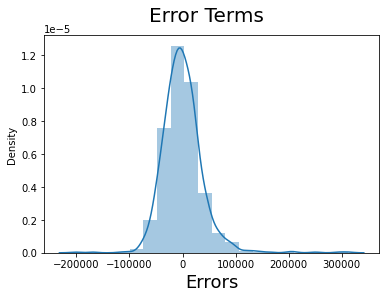

In [256]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnst), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Evaluate R2 of Train model

In [257]:
#evaluate model
r2 = r2_score(y_true = y_train,y_pred = y_train_cnst)
round(r2,2)

0.76

In [258]:
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
rss = np.sum(np.square(y_train - y_train_cnst))
print(rss)
mse = mean_squared_error(y_train, y_train_cnst)
print(mse)
rmse = mse**0.5
print(rmse)

1532554798114.5913
1501033102.952587
38743.168468164644


In [259]:
# Residual analysis
y_res = (y_train - y_train_cnst)
#y_res

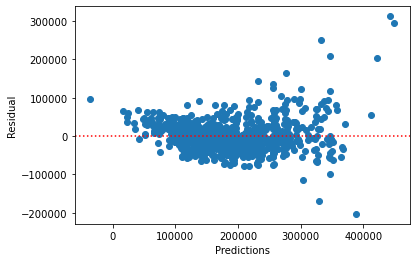

In [260]:
# data['res'] = y_res
plt.scatter( y_train_cnst , y_res)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

## Prediction and Evalution on Test Data

In [261]:
#scale Test set
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
1436,-0.433386,-0.144614,-1.496155,0.384025,-0.679020,-0.558025,-0.699764,-0.533302,-0.653302,0.665348,0.361022,-0.293313,-0.703973,-0.431488,-1.181447,-0.765928,-0.789230,-0.124502,-1.230557,-0.837450,-0.247791,-1.028080,-0.753316,0.175669,-0.234155,-0.776063,-0.937484,-0.927153,-0.985354,0.232304,0.306009,0.264038,-0.744598,-0.710899,-0.368121,-0.121922,-0.275126,-0.062302,-0.084263,-0.469175,120500,-0.016404,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
57,0.880036,0.112107,0.648310,-0.532073,0.923321,-0.558025,1.051361,0.577925,-0.653302,-1.226909,-0.964030,-0.293313,0.660517,-0.440205,0.871757,-0.775986,1.186484,-0.124502,0.379709,-0.837450,-0.247791,0.784821,1.244440,0.175669,-0.234155,0.741868,0.308833,-0.927153,-0.985354,0.298247,0.306009,0.438477,-0.744598,0.347093,-0.368121,-0.121922,-0.275126,-0.062302,-0.084263,0.622834,196500,-1.137362,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
780,-0.297515,-0.253806,0.648310,-0.532073,0.534875,-0.355087,-0.699764,0.577925,-0.653302,-1.226909,-0.964030,-0.293313,1.501060,0.381373,-0.154845,0.212191,-0.789230,-0.124502,-0.498789,-0.837450,-0.247791,0.784821,-0.753316,0.175669,-0.234155,-0.776063,-0.314326,0.622148,0.658513,0.278464,0.306009,-0.329996,1.023633,-0.393502,-0.368121,-0.121922,-0.275126,-0.062302,-0.084263,

In [262]:
df_test.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
count,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.0,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.0,439.0,439.0,439.000000,439.0,439.000000,439.000000,439.0,439.000000,439.000000,439.0,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.0,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000
mean,0.044381,0.008

In [263]:
#create y_test and X_test
y_test = df_test.pop('SalePrice')
X_test = df_test

In [264]:
#trained model columns
X_train_new.columns

Index(['OverallQual', 'BsmtQual', 'BsmtUnfSF', '2ndFlrSF', 'KitchenQual', 'GarageCars', 'MSSubClass_75', 'MSSubClass_90', 'MSSubClass_120', 'MSSubClass_160', 'LotShape_IR3', 'Neighborhood_ClearCr', 'Neighborhood_NoRidge', 'Exterior1st_BrkFace', 'Exterior1st_ImStucc', 'Exterior1st_Stone', 'Exterior2nd_CmentBd', 'Exterior2nd_Stucco', 'Exterior2nd_Wd Shng', 'Foundation_Slab', 'Foundation_Wood'], dtype='object')

In [265]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [266]:
#Running the Linear Model
test_lm = sm.OLS(y_test,X_test_new).fit()

In [267]:
#check summary()
test_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     69.19
Date:                Tue, 25 Apr 2023   Prob (F-statistic):          3.28e-116
Time:                        13:19:11   Log-Likelihood:                -5268.7
No. Observations:                 439   AIC:                         1.058e+04
Df Residuals:                     419   BIC:                         1.066e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   1.8e+05   2261.006     79.624      0.000    1.76e+05    1.84e+05
OverallQual           3.734e+04   3575.874     10.441      0.000    3.03e+04    4.44e+04
BsmtQual              1.571e+04   3441.536      4.565      0.000    8947.242    2.25e+04
BsmtUnfSF            -5098.9492   2175.769     -2.344      0.020   -9375.732    -822.167
2ndFlrSF              6046.4634   2214.307      2.731      0.007    1693.928    1.04e+04
KitchenQual               1e+04   2718.509      3.679      0.000    4656.459    1.53e+04
GarageCars            1.877e+04   2661.622      7.051      0.000    1.35e+04     2.4e+04
MSSubClass_75         1.334e+04   1.73e+04      0.773      0.440   -2.06e+04    4.73e+04
MSSubClass_90        -1.017e+04   1.32e+04     -0.770      0.442   -3.61e+04    1.58e+04
MSSubClass_120        -3.69e+04   9439.988     -3.909      0.000   -5.55e+04   -1.83e+04
MSSubClass_160       -4.865e+04   1.06e+04     -4.593      0.000   -6.95e+04   -2.78e+04
LotShape_IR3          3436.0703   4.07e+04      0.084      0.933   -7.66e+04    8.35e+04
Neighborhood_ClearCr  2.481e+04   1.47e+04      1.684      0.093   -4148.463    5.38e+04
Neighborhood_NoRidge  3.601e+04   1.71e+04      2.100      0.036    2306.481    6.97e+04
Exterior1st_BrkFace   2.528e+04   9431.999      2.680      0.008    6740.591    4.38e+04
Exterior1st_ImStucc   8.084e-12   8.71e-12      0.929      0.354   -9.03e-12    2.52e-11
Exterior1st_Stone     1.237e-11   7.47e-12      1.657      0.098   -2.31e-12     2.7e-11
Exterior2nd_CmentBd   2.468e+04   9291.277      2.656      0.008    6413.010    4.29e+04
Exterior2nd_Stucco    8808.4906   1.68e+04      0.524      0.601   -2.43e+04    4.19e+04
Exterior2nd_Wd Shng   3.469e+04   1.69e+04      2.057      0.040    1543.068    6.78e+04
Foundation_Slab       5.646e+04   2.03e+04      2.780      0.006    1.65e+04    9.64e+04
Foundation_Wood      -8.346e+04   4.09e+04     -2.038      0.042   -1.64e+05   -2971.337
==============================================================================
Omnibus:                      201.275   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1663.289
Skew:                           1.773   Prob(JB):                         0.00
Kurtosis:                      11.852   Cond. No.                     3.03e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.36e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [268]:
# Making predictions
y_pred = lm.predict(X_test_new)

## calculate r2 score of Test model

In [269]:
#evaluate model
r2 = r2_score(y_true = y_test,y_pred = y_pred)
round(r2,2)

0.74

In [270]:
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
rss = np.sum(np.square(y_test - y_pred))
print(rss)
mse = mean_squared_error(y_test, y_pred)
print(mse)
rmse = mse**0.5
print(rmse)

741529763201.6611
1689133856.9513922
41099.07367510115


In [271]:
#drop the const
X_test_new = X_test_new.drop(['const'], axis=1)

In [272]:
#check final VIf of 9 columns
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,OverallQual,2.88
1,BsmtQual,2.58
4,KitchenQual,2.00
5,GarageCars,1.68
19,Foundation_Slab,1.64
3,2ndFlrSF,1.36
8,MSSubClass_120,1.18
2,BsmtUnfSF,1.18
12,Neighborhood_NoRidge,1.17
7,MSSubClass_90,1.16


Text(0, 0.5, 'y_pred')

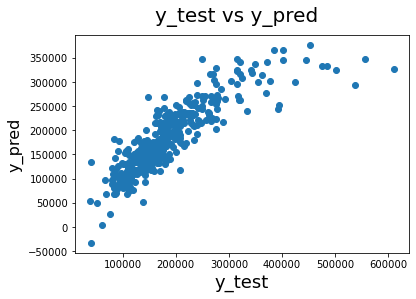

In [273]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [274]:
X_train_new.columns

Index(['OverallQual', 'BsmtQual', 'BsmtUnfSF', '2ndFlrSF', 'KitchenQual', 'GarageCars', 'MSSubClass_75', 'MSSubClass_90', 'MSSubClass_120', 'MSSubClass_160', 'LotShape_IR3', 'Neighborhood_ClearCr', 'Neighborhood_NoRidge', 'Exterior1st_BrkFace', 'Exterior1st_ImStucc', 'Exterior1st_Stone', 'Exterior2nd_CmentBd', 'Exterior2nd_Stucco', 'Exterior2nd_Wd Shng', 'Foundation_Slab', 'Foundation_Wood'], dtype='object')

In [276]:
#final dataframe 
final_df = house_data[['OverallQual', 'BsmtQual', 'BsmtUnfSF', '2ndFlrSF', 'KitchenQual', 'GarageCars', 'MSSubClass_75', 'MSSubClass_90', 'MSSubClass_120', 'MSSubClass_160', 'LotShape_IR3', 'Neighborhood_ClearCr', 'Neighborhood_NoRidge', 'Exterior1st_BrkFace', 'Exterior1st_ImStucc', 'Exterior1st_Stone', 'Exterior2nd_CmentBd', 'Exterior2nd_Stucco', 'Exterior2nd_Wd Shng', 'Foundation_Slab', 'Foundation_Wood']]
final_df.head()

,OverallQual,BsmtQual,BsmtUnfSF,2ndFlrSF,KitchenQual,GarageCars,MSSubClass_75,MSSubClass_90,MSSubClass_120,MSSubClass_160,LotShape_IR3,Neighborhood_ClearCr,Neighborhood_NoRidge,Exterior1st_BrkFace,Exterior1st_ImStucc,Exterior1st_Stone,Exterior2nd_CmentBd,Exterior2nd_Stucco,Exterior2nd_Wd Shng,Foundation_Slab,Foundation_Wood
0,7,4,150,854,4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,6,4,284,0,3,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,7,4,434,866,4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,7,3,540,756,4,3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,8,4,490,1053,4,3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


# Final evalution

- No of Variables = 21 i.e.['OverallQual', 'BsmtQual', 'BsmtUnfSF', '2ndFlrSF', 'KitchenQual', 'GarageCars', 'MSSubClass_75', 'MSSubClass_90', 'MSSubClass_120', 'MSSubClass_160', 'LotShape_IR3', 'Neighborhood_ClearCr', 'Neighborhood_NoRidge', 'Exterior1st_BrkFace', 'Exterior1st_ImStucc', 'Exterior1st_Stone', 'Exterior2nd_CmentBd', 'Exterior2nd_Stucco', 'Exterior2nd_Wd Shng', 'Foundation_Slab', 'Foundation_Wood']
- VIF < 5
- p-value < 0.05
- r2 score for Train Data set model = 0.76
- r2 score for Test Data set model = 0.74

In [277]:
y_pred_train = lm.predict(X_train_lm)
# y_pred_test = test_lm.predict(X_test_new)
y_pred_test = y_pred

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.75985752776791
0.7375789482654738
1532554798114.5913
741529763201.6611
1501033102.952587
1689133856.9513922


# Ridge Regression

In [278]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_new, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [279]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 10.0}


In [280]:

alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_new, y_train)
print(ridge.coef_)

[ 34339.50286837  12346.36761358  -2657.5803581    7050.10724803
  14884.1042987   13890.3801976   -3020.08897599   6979.39744712
 -19529.5443756  -41861.04167454  -1102.50532118  25671.25058785
  51001.4931248   25829.17283094  -4906.21755845   5325.82165185
  12570.1543891   -9744.35513038 -12945.86621829  17604.52389883
   1101.40368954]


In [281]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train_new)
y_pred_test = ridge.predict(X_test_new)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.7554701274534492
0.7400089755912127
1560554557343.679
734663173895.9688
1528456961.159333
1673492423.4532318


# Lasso

In [282]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_new, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [283]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 500}


In [284]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_new, y_train) 

Lasso(alpha=100)

In [285]:
lasso.coef_

array([ 34411.03233711,  12969.94709277,  -2646.38794608,   6547.72112674,
        14705.16120466,  13294.65000695,     -0.        ,   5449.10795805,
       -21723.10915203, -48350.2518515 ,     -0.        ,  33841.13939796,
        63817.58328205,  30394.36209482,     -0.        ,      0.        ,
        14632.76130947,  -9011.20336829, -13091.13248042,  24120.90476507,
            0.        ])

In [286]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train_new)
y_pred_test = lasso.predict(X_test_new)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.7580948131953751
0.7395545967847692
1543804189572.6506
735947123512.5065
1512051116.13384
1676417137.8417003


In [287]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),7.598575e-01,7.554701e-01,7.580948e-01
1,R2 Score (Test),7.375789e-01,7.400090e-01,7.395546e-01
2,RSS (Train),1.532555e+12,1.560555e+12,1.543804e+12
3,RSS (Test),7.415298e+11,7.346632e+11,7.359471e+11
4,MSE (Train),3.874317e+04,3.909549e+04,3.888510e+04
5,MSE (Test),4.109907e+04,4.090834e+04,4.094407e+04


## Lets observe the changes in the coefficients after regularization

In [288]:
betas = pd.DataFrame(index=X.columns)

In [289]:
betas.rows = X.columns

In [290]:
betas['Linear'] = lm.params
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [291]:
pd.set_option('display.max_rows', None)
betas.head(68)

,Linear,Ridge,Lasso
OverallQual,34414.416995,34339.502868,34411.032337
BsmtQual,13915.105993,12346.367614,12969.947093
BsmtUnfSF,-2733.714543,-2657.580358,-2646.387946
2ndFlrSF,6571.658076,7050.107248,6547.721127
KitchenQual,14472.017500,14884.104299,14705.161205
GarageCars,13040.023714,13890.380198,13294.650007
MSSubClass_75,-4316.920821,-3020.088976,-0.000000
MSSubClass_90,7247.476140,6979.397447,5449.107958
MSSubClass_120,-24080.541319,-19529.544376,-21723.109152
MSSubClass_160,-50789.106972,-41861.041675,-48350.251851


### Que1: Double the values of Alpha for lasso & Ridge

In [292]:
#earlier for Ridge alpha = 10 now take 20
alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_new, y_train)
print(ridge.coef_)
y_pred_train = ridge.predict(X_train_new)
y_pred_test = ridge.predict(X_test_new)

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)

[ 34024.25946546  11716.34180118  -2501.34454998   7274.18754639
  15033.5233741   14412.46313056  -2237.91302861   6101.0134769
 -16490.8476034  -35451.5547285    -633.46066266  19106.04862528
  41515.62151194  20863.15905681  -2122.79265741   2898.95858035
   9523.60895121  -7451.88711425 -10802.54641573  12284.02862189
    597.92646364]
0.7500492896719995
0.7390913447509199


In [293]:
#earlier for Lasso alpha = 100 now take 200
alpha =200

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_new, y_train) 
print(lasso.coef_)
y_pred_train = lasso.predict(X_train_new)
y_pred_test = lasso.predict(X_test_new)

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)

[ 34499.05749414  12003.14557001  -2541.12256791   6448.11866233
  14735.18584857  13620.11771442     -0.           3584.22892032
 -19333.5813425  -45830.62251913     -0.          28516.85678052
  61184.15760369  27190.18665839     -0.              0.
  11427.89561519  -3885.16293374  -9921.06861503  15857.45118527
      0.        ]
0.7562503743836485
0.7397282391894869


In [294]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_new, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [295]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 500}


In [296]:
#Fitting Ridge model for alpha = 500 and printing coefficients which have been penalised

alpha =500

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_new, y_train) 

Lasso(alpha=500)

In [297]:
lasso.coef_

array([ 34630.86389571,   9852.82122668,  -2137.10707742,   6353.29918446,
        14794.91590031,  14382.00859065,     -0.        ,      0.        ,
       -12459.41500108, -38532.5267927 ,     -0.        ,  12563.578295  ,
        52765.25529642,  17172.10413211,     -0.        ,      0.        ,
         1467.77445629,     -0.        ,   -925.11005111,      0.        ,
            0.        ])

In [298]:
y_pred_train = lasso.predict(X_train_new)
y_pred_test = lasso.predict(X_test_new)

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)

0.7463764609520699
0.7357393608666996


In [299]:
X_train_new.columns

Index(['OverallQual', 'BsmtQual', 'BsmtUnfSF', '2ndFlrSF', 'KitchenQual', 'GarageCars', 'MSSubClass_75', 'MSSubClass_90', 'MSSubClass_120', 'MSSubClass_160', 'LotShape_IR3', 'Neighborhood_ClearCr', 'Neighborhood_NoRidge', 'Exterior1st_BrkFace', 'Exterior1st_ImStucc', 'Exterior1st_Stone', 'Exterior2nd_CmentBd', 'Exterior2nd_Stucco', 'Exterior2nd_Wd Shng', 'Foundation_Slab', 'Foundation_Wood'], dtype='object')